In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [37]:
video_path = 'video.avi'
cap = cv2.VideoCapture(video_path)
#Consider a window of size N,take the average of frames in that window,then get its histogram

N = 30
Selected = []
taken_this_iter = 0
i = 0
prev = None
#video_dim = (768, 1366, 3)
video_dim = (720, 1280,3)

cap2 = cv2.VideoCapture(video_path)
r,f = cap2.read()
video_dim = f.shape
cap2.close()

SuperFrame = np.zeros(video_dim).astype(np.float32)
frames = []
final = []
lastHist = None
currHist = None
thresh = 0.6

while(1):
    taken_this_iter = 0
    SuperFrame =  np.zeros(video_dim).astype(np.float32)
    frames = []
    while(taken_this_iter < N):
        
        ret ,frame = cap.read()
        if ret==True:
            #Frame exists
            #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV).astype(np.float32)
            #print(hsv.shape)
            taken_this_iter+=1
#             if SuperFrame != 0:
#                 SuperFrame += hsv
#             else:
#                 SuperFrame = hsv
            SuperFrame += frame.astype(np.float32)
            frames.append(frame)
        else:
            break
    if taken_this_iter !=0:
        SuperFrame = SuperFrame/taken_this_iter
    if i==0:
        lastHist = cv2.calcHist([SuperFrame.astype(np.uint8)],[0],None,[256],[0,256])
        print('0th superframe created')
        prev = i
        Selected.append(i)
        for frame_sel in frames:
                final.append(frame_sel)
    elif taken_this_iter !=0:
        currHist = cv2.calcHist([SuperFrame.astype(np.uint8)],[0],None,[256],[0,256])
        #Compare with last hist
        similar_score = cv2.compareHist(currHist,lastHist,cv2.HISTCMP_CORREL)
        print("Super frame ",str(i)," has similarity score with prev selected frame ",str(prev)," of ",str(similar_score))
        if similar_score < thresh:
            Selected.append(i)
            print("Super frame "+str(i)+" is accepted")
            prev = i
            lastHist = currHist
            for frame_sel in frames:
                final.append(frame_sel)
    
    i=i+1
    if taken_this_iter==0:
        #Video ended
        break
#Now create summary
size = (video_dim[1],video_dim[0])
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in range(len(final)):
    out.write(final[i])
out.release()
        
cv2.destroyAllWindows()
cap.release()

0th superframe created
Super frame  1  has similarity score with prev selected frame  0  of  0.6865513340514598
Super frame  2  has similarity score with prev selected frame  0  of  0.6945969388686305
Super frame  3  has similarity score with prev selected frame  0  of  0.6924795055304758


0


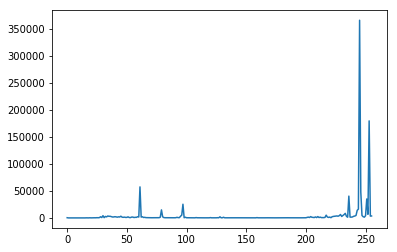

In [31]:
plt.plot(lastHist)
print(taken_this_iter)

In [3]:
print(Selected)

[0, 2, 36]


In [35]:
cap = cv2.VideoCapture('video.avi')
ret,frame = cap.read()
print(frame.shape)
#print(frame)
hist = cv2.calcHist([frame.astype(np.uint8)],[0],None,[256],[0,256])
frame = frame.astype(np.float32)
#print(hist)
for i in range(100):
    ret,framex = cap.read()
    frame += framex.astype(np.float32)
data = frame/101

hist = cv2.calcHist([data.astype(np.uint8)],[0],None,[256],[0,256])
print(frame+frame2)
plt.plot(hist)
cv2.destroyAllWindows()
cap.release()

(720, 1280, 3)


ValueError: operands could not be broadcast together with shapes (720,1280,3) (768,1366,3) 